# Time series forecasting with Facebook Prophet
####Dataset download > [Retail Data Analytics](https://www.kaggle.com/datasets/manjeetsingh/retaildataset)
####Library > [FBProphet](https://facebook.github.io/prophet/)

In this example, we do time series demand forecasting on a company's retail sales data. We will use Facebook Prophet that uses scikit APIs to generate a large number of store-item level forecasts.

In [0]:
%pip install pystan==2.19.1.1  # per https://github.com/facebook/prophet/commit/82f3399409b7646c49280688f59e5a3d2c936d39#comments
%pip install fbprophet==0.6

Python interpreter will be restarted.
Requirement already satisfied: pystan==2.19.1.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (2.19.1.1)
Requirement already satisfied: numpy>=1.7 in /databricks/python3/lib/python3.8/site-packages (from pystan==2.19.1.1) (1.20.1)
Requirement already satisfied: Cython!=0.25.1,>=0.22 in /databricks/python3/lib/python3.8/site-packages (from pystan==2.19.1.1) (0.29.23)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: fbprophet==0.6 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (0.6)
Requirement already satisfied: Cython>=0.22 in /databricks/python3/lib/python3.8/site-packages (from fbprophet==0.6) (0.29.23)
Requirement already satisfied: cmdstanpy==0.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (0.4.0)
Requirement already satisfied: pystan>=2.14 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (2.19.1.1)
Requirement already satisfied: numpy>=1.10.0 in /databricks/python3/lib/python3.8/site-packages (from fbprophet==0.6) (1.20.1)
Requirement already satisfied: pandas>=0.23.4 in /databricks/python3/lib/python3.8/site-packages (from fbprophet==0.6) (1.2.4)
Requirement already satisfied: matplotlib>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from fbprophet==0.6) (3.4.2)
Requirement already satisfied: LunarCalendar>=0.0.9 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (0.0.9)
Requirement already satisfied: convertdate>=2.1.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (2.4.0)
Requirement already satisfied: holidays>=0.9.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (0.13)
Requirement already satisfied: setuptools-git>=1.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from fbprophet==0.6) (1.2)
Requirement already satisfied: python-dateutil>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from fbprophet==0.6) (2.8.1)
Requirement already satisfied: pymeeus<=1,>=0.3.13 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from convertdate>=2.1.2->fbprophet==0.6) (0.5.11)
Requirement already satisfied: hijri-converter in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from holidays>=0.9.5->fbprophet==0.6) (2.2.3)
Requirement already satisfied: korean-lunar-calendar in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from holidays>=0.9.5->fbprophet==0.6) (0.2.1)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from LunarCalendar>=0.0.9->fbprophet==0.6) (2020.5)
Requirement already satisfied: ephem>=3.7.5.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages (from LunarCalendar>=0.0.9->fbprophet==0.6) (4.1.3)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet==0.6) (1.3.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet==0.6) (0.10.0)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet==0.6) (8.2.0)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-

In [0]:
storageAccount="salabcommercedatalake" # specify your ADLS account name
containerName = "forecasting" # specify your ADLS container

mountpoint = "/mnt/{}".format(containerName)
storageEndPoint ="abfss://{0}@{1}.dfs.core.windows.net/".format(containerName, storageAccount)

print ('Mount Point ='+mountpoint)

#ClientId, TenantId and Secret is for the Application
clientID ="xxxxxxxxxxxxxxxx"
tenantID ="xxxxxxxxxxxxxxx"
clientSecret ="xxxxxxxxxxxxxxxxxx"
oauth2Endpoint = "https://login.microsoftonline.com/{}/oauth2/token".format(tenantID)


configs = {"fs.azure.account.auth.type": "OAuth",
           "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
           "fs.azure.account.oauth2.client.id": clientID,
           "fs.azure.account.oauth2.client.secret": clientSecret,
           "fs.azure.account.oauth2.client.endpoint": oauth2Endpoint}

try:
  dbutils.fs.mount(
  source = storageEndPoint,
  mount_point = mountpoint,
  extra_configs = configs)
except Exception as e:
    print("Already mounted...."+mountpoint)
    


Mount Point =/mnt/forecasting
Already mounted..../mnt/forecasting

In [0]:
# lets see what files are in the mounted storage
display(dbutils.fs.ls("dbfs:/mnt/forecasting"))

path,name,size,modificationTime
dbfs:/mnt/forecasting/INVENTTRANS_00001_USMF.csv,INVENTTRANS_00001_USMF.csv,4685910,1653002315000
dbfs:/mnt/forecasting/INVENTTRANS_USMF.csv,INVENTTRANS_USMF.csv,4899715,1653009102000
dbfs:/mnt/forecasting/RETAILTRANSACTIONSALESTRANS_00001.csv,RETAILTRANSACTIONSALESTRANS_00001.csv,211954954,1652931574000
dbfs:/mnt/forecasting/RETAILTRANSACTIONTABLE_00001.csv,RETAILTRANSACTIONTABLE_00001.csv,51650018,1652928749000
dbfs:/mnt/forecasting/Sales.csv,Sales.csv,21564550,1653088936000
dbfs:/mnt/forecasting/Sales_21052022.csv,Sales_21052022.csv,22487921,1653104132000
dbfs:/mnt/forecasting/hts-sample-train.csv,hts-sample-train.csv,521334,1653265155000
dbfs:/mnt/forecasting/sales data-set.csv,sales data-set.csv,9633567,1653272162000
dbfs:/mnt/forecasting/train.csv,train.csv,17333449,1653264380000


## Step 1: Examine the Dataset
In our training data, we have sales for 45 stores over a period from 2010 till Oct 2012. Next, we will upload the csv to ADLS storage and load in a dataframe. You may need to format the csv data. For example, Prophet expects the date to be in yyyy-mm-dd format.

In [0]:
from pyspark.sql.types import *

# structure of the training data set
train_schema = StructType([
  StructField('store', IntegerType()),
  StructField('item', IntegerType()),
  StructField('date', DateType()),
  StructField('sales', IntegerType())
  ])

# read the training file into a dataframe
df_fcast = spark.read.csv(
  'dbfs:/mnt/forecasting/sales data-set.csv', 
  header=True, 
  schema=train_schema
  )

# show data
display(df_fcast.limit(50))

store,item,date,sales
1,1,2010-02-05,24925
1,1,2010-02-12,46039
1,1,2010-02-19,41596
1,1,2010-02-26,19404
1,1,2010-03-05,21828
1,1,2010-03-12,21043
1,1,2010-03-19,22137
1,1,2010-03-26,26229
1,1,2010-04-02,57258
1,1,2010-04-09,42961


In [0]:
df_fcast.printSchema()

root
-- store: integer (nullable = true)
-- item: integer (nullable = true)
-- date: date (nullable = true)
-- sales: integer (nullable = true)

In [0]:
#create a view from dataframe
df_fcast.createOrReplaceTempView("vw_fcast")

When performing demand forecasting, we are often interested in general trends and seasonality.  Let's start our exploration by examing the annual trend in unit sales:

In [0]:
%sql

SELECT
  year(date) as year, 
  sum(sales) as sales
FROM vw_fcast
GROUP BY year(date)
ORDER BY year;

year,sales
2010,2288888248
2011,2448201572
2012,2000134131


The sales data has a peculiar trend. It rises from 2010 to 2011 but then declines in 2012. 2012 data is not till December so that may explain. There could also be other external factors, economy, comptetion that could explain. That discussion is outside the scope for our notebook. By just quickly eyeballing this dataset, it feels safe to assume that if our goal is to make a forecast a few days, months or even a year out, we might expect continued linear downward growth over that time span.

Now let's examine seasonality.  If we aggregate the data around the individual months in each year, a distinct yearly seasonal pattern is observed which peaks in few months and comes down:

In [0]:

%sql

SELECT 
  TRUNC(date, 'MM') as month,
  SUM(sales) as sales
FROM vw_fcast
GROUP BY TRUNC(date, 'MM')
ORDER BY month;

month,sales
2010-02-01,190333174
2010-03-01,181920044
2010-04-01,231412610
2010-05-01,186711144
2010-06-01,192246424
2010-07-01,232580353
2010-08-01,187640217
2010-09-01,177268025
2010-10-01,217161965
2010-11-01,202853562


Aggregating the data at monthly level, we can see a clear crest and trough pattern. Sales picks up slowly and December has the highest sales, which then starts dropping. December sales can explained due to christmas and holidays.

In [0]:
%sql

""" 
SELECT
  YEAR(date) as year,
  (
    CASE
      WHEN DATE_FORMAT(date, 'E') = 'Sun' THEN 0
      WHEN DATE_FORMAT(date, 'E') = 'Mon' THEN 1
      WHEN DATE_FORMAT(date, 'E') = 'Tue' THEN 2
      WHEN DATE_FORMAT(date, 'E') = 'Wed' THEN 3
      WHEN DATE_FORMAT(date, 'E') = 'Thu' THEN 4
      WHEN DATE_FORMAT(date, 'E') = 'Fri' THEN 5
      WHEN DATE_FORMAT(date, 'E') = 'Sat' THEN 6
    END
  ) % 7 as weekday,
  AVG(sales) as sales
FROM (
  SELECT 
    date,
    SUM(sales) as sales
  FROM vw_fcast
  GROUP BY date
 ) x
GROUP BY year, weekday
ORDER BY year, weekday;
"""

year,weekday,sales
2010,5,4.7685171833333336E7
2011,5,4.7080799461538464E7
2012,5,4.651474723255814E7


We do not have daily sales data only weekly. Now that we are oriented to the basic patterns within our data, let's explore how we might build a forecast. But first we need to write a sql to find out store, item combinations with only single records. This will need to be excluded as Prophet will not work on these.

In [0]:
%sql

SELECT
    store, item,
    count(*)
  FROM vw_fcast
  GROUP BY store, item
  HAVING count(*) < 2
  

store,item,count(1)
23,99,1
22,99,1
27,39,1
34,78,1
38,99,1
36,29,1
29,99,1
21,96,1
33,27,1
21,50,1


## Step 2: Build a Single Forecast

Before attempting to generate forecasts for individual combinations of stores and items, it might be helpful to build a single forecast for no other reason than to orient ourselves to the use of FBProphet.

Our first step is to assemble the historical dataset on which we will train the model:

In [0]:
# query to aggregate data to date (ds) level
sql_statement = '''
  SELECT
    CAST(date as date) as ds,
    sales as y
  FROM vw_fcast
  WHERE store=1 AND item=1
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
history_pd = history_pd.dropna()

Now, we will import the fbprophet library, but because it can be a bit verbose when in use, we will need to fine-tune the logging settings in our environment:

In [0]:
from fbprophet import Prophet
import logging

# disable informational messages from fbprophet
logging.getLogger('py4j').setLevel(logging.ERROR)

Based on our review of the data, it looks like we should set our overall growth pattern to linear and enable the evaluation of weekly and yearly seasonal patterns. We might also wish to set our seasonality mode to multiplicative as the seasonal pattern seems to grow with overall growth in sales:

In [0]:
# set model parameters
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(history_pd)

Out[8]: <fbprophet.forecaster.Prophet at 0x7f05b846cfd0>

Now that we have a trained model, let's use it to build a 180-day forecast:

In [0]:
# define a dataset including both historical dates & 180-days beyond the last available date
future_pd = model.make_future_dataframe(
  periods=180, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_pd = model.predict(future_pd)

forecast_pd.head(10)

Out[9]:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2010-02-05,26465.562925,20059.124400,43461.667208,26465.562925,26465.562925,0.213500,0.213500,0.213500,-0.13665,-0.13665,-0.13665,0.350150,0.350150,0.350150,0.0,0.0,0.0,32115.956889
1,2010-02-12,26465.344196,26341.246631,49376.385130,26465.344196,26465.344196,0.438470,0.438470,0.438470,-0.13665,-0.13665,-0.13665,0.575120,0.575120,0.575120,0.0,0.0,0.0,38069.605919
2,2010-02-19,26465.125466,25087.195989,48175.360058,26465.125466,26465.125466,0.388826,0.388826,0.388826,-0.13665,-0.13665,-0.13665,0.525476,0.525476,0.525476,0.0,0.0,0.0,36755.453130
3,2010-02-26,26464.906737,17981.554469,40265.205206,26464.906737,26464.906737,0.091551,0.091551,0.091551,-0.13665,-0.13665,-0.13665,0.228201,0.228201,0.228201,0.0,0.0,0.0,28887.791465
4,2010-03-05,26464.688007,7967.204677,30931.680642,26464.688007,26464.688007,-0.247792,-0.247792,-0.247792,-0.13665,-0.13665,-0.13665,-0.111141,-0.111141,-0.111141,0.0,0.0,0.0,19906.960747
5,2010-03-12,26464.469278,4972.902863,27491.872084,26464.469278,26464.469278,-0.379820,-0.379820,-0.379820,-0.13665,-0.13665,-0.13665,-0.243169,-0.243169,-0.243169,0.0,0.0,0.0,16412.741643
6,2010-03-19,26464.250547,9286.310675,31943.164406,26464.250547,26464.250547,-0.209352,-0.209352,-0.209352,-0.13665,-0.13665,-0.13665,-0.072701,-0.072701,-0.072701,0.0,0.0,0.0,20923.916107
7,2010-03-26,26464.031815,17882.198843,40581.028202,26464.031815,26464.031815,0.124085,0.124085,0.124085,-0.13665,-0.13665,-0.13665,0.260735,0.260735,0.260735,0.0,0.0,0.0,29747.818102
8,2010-04-02,26463.813084,24327.434190,46843.259528,26463.813084,26463.813084,0.369154,0.369154,0.369154,-0.13665,-0.13665,-0.13665,0.505805,0.505805,0.505805,0.0,0.0,0.0,36233.046513
9,2010-04-09,26463.594353,24805.878775,47578.855754,26463.594353,26463.594353,0.374553,0.374553,0.374553,-0.13665,-0.13665,-0.13665,0.511204,0.511204,0.511204,0.0,0.0,0.0,36375.619685


How did our model perform? Here we can see the general and seasonal trends in our model presented as graphs:

/local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages/fbprophet/plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
 ax.set_yticklabels(yticklabels)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-efa934f9-c437-4fe3-b08f-76d4741a06c8/lib/python3.8/site-packages/fbprophet/plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
 ax.set_yticklabels(yticklabels)

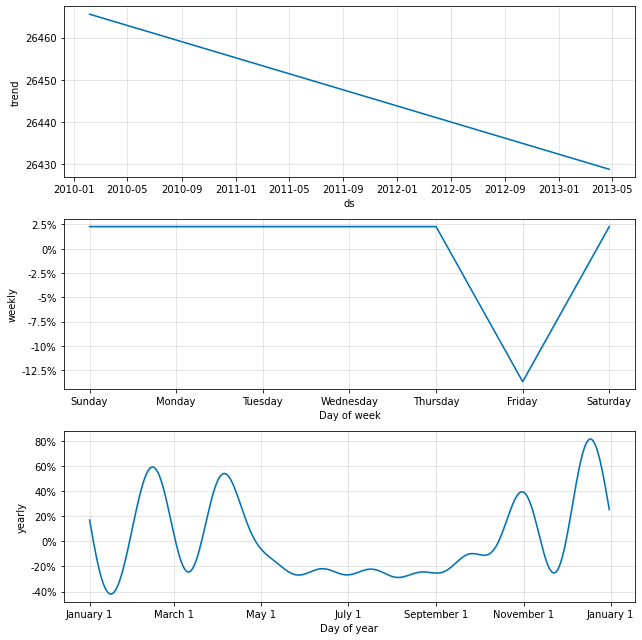

In [0]:
trends_fig = model.plot_components(forecast_pd)
display(trends_fig)

And here, we can see how our actual and predicted data line up as well as a forecast for the future, though we will limit our graph to the last year of historical data just to keep it readable:

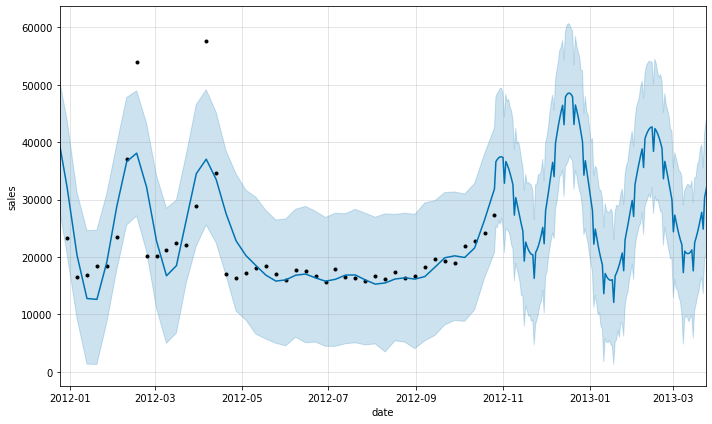

In [0]:
predict_fig = model.plot( forecast_pd, xlabel='date', ylabel='sales')

# adjust figure to display dates from last year + the 90 day forecast
xlim = predict_fig.axes[0].get_xlim()
new_xlim = ( xlim[1]-(180.0+365.0), xlim[1]-90.0)
predict_fig.axes[0].set_xlim(new_xlim)

display(predict_fig)

Bartosz Mikulski provides [an excellent breakdown](https://www.mikulskibartosz.name/prophet-plot-explained/) of it that is well worth checking out.  In a nutshell, the black dots represent our actuals with the darker blue line representing our predictions and the lighter blue band representing our (95%) uncertainty interval.

Visual inspection is useful, but a better way to evaulate the forecast is to calculate Mean Absolute Error, Mean Squared Error and Root Mean Squared Error values for the predicted relative to the actual values in our set. Our date is till 26/10/2012, we will predict beyond that date.

In [0]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from datetime import date

# get historical actuals & predictions for comparison
actuals_pd = history_pd[ history_pd['ds'] < date(2012, 10, 27) ]['y']
predicted_pd = forecast_pd[ forecast_pd['ds'] < pd.to_datetime('2012-10-27') ]['yhat']

# calculate evaluation metrics
mae = mean_absolute_error(actuals_pd, predicted_pd)
mse = mean_squared_error(actuals_pd, predicted_pd)
rmse = sqrt(mse)

# print metrics to the screen
print( '\n'.join(['MAE: {0}', 'MSE: {1}', 'RMSE: {2}']).format(mae, mse, rmse) )

MAE: 3597.948446996348
MSE: 34131957.01737191
RMSE: 5842.256158144036

FBProphet provides [additional means](https://facebook.github.io/prophet/docs/diagnostics.html) for evaluating how your forecasts hold up over time. You're strongly encouraged to consider using these and those additional techniques when building your forecast models but we'll skip this here to focus on the scaling challenge.

## Step 3: Scale Forecast Generation

With the mechanics under our belt, let's now tackle our original goal of building numerous, fine-grain models & forecasts for individual store and item combinations.  We will start by assembling sales data at the store-item-date level of granularity:

**NOTE**: The data in this data set should already be aggregated at this level of granularity but we are explicitly aggregating to ensure we have the expected data structure.
We need to exclude those store-item combinations that have only single records.

In [0]:
sql_statement = '''
  SELECT
    store,
    item,
    CAST(date as date) as ds,
    SUM(sales) as y
  FROM vw_fcast a
  
  where not exists  
  (
   SELECT
    store 
  FROM vw_fcast b

  where a.store = b.store
  GROUP BY store, item
  HAVING count(*) < 2
  )
  
  GROUP BY store, item, ds
  ORDER BY store, item, ds
  '''
"""
sql_statement = '''
  SELECT
    store,
    item,
    CAST(date as date) as ds,
    SUM(sales) as y
  FROM vw_fcast
  GROUP BY store, item, ds
  ORDER BY store, item, ds
  '''
"""
store_item_history = (
  spark
    .sql( sql_statement )
    .repartition(sc.defaultParallelism, ['store', 'item'])
  ).cache()

With our data aggregated at the store-item-date level, we need to consider how we will pass our data to FBProphet. If our goal is to build a model for each store and item combination, we will need to pass in a store-item subset from the dataset we just assembled, train a model on that subset, and receive a store-item forecast back. We'd expect that forecast to be returned as a dataset with a structure like this where we retain the store and item identifiers for which the forecast was assembled and we limit the output to just the relevant subset of fields generated by the Prophet model:

In [0]:
from pyspark.sql.types import *

result_schema =StructType([
  StructField('ds',DateType()),
  StructField('store',IntegerType()),
  StructField('item',IntegerType()),
  StructField('y',FloatType()),
  StructField('yhat',FloatType()),
  StructField('yhat_upper',FloatType()),
  StructField('yhat_lower',FloatType())
  ])

To train the model and generate a forecast we will leverage a Pandas function.  We will define this function to receive a subset of data organized around a store and item combination.  It will return a forecast in the format identified in the previous cell:

In [0]:
def forecast_store_item( history_pd: pd.DataFrame ) -> pd.DataFrame:
  
  # TRAIN MODEL AS BEFORE
  # --------------------------------------
  # remove missing values (more likely at day-store-item level)
  history_pd = history_pd.dropna()
  
  # configure the model
  model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
    )
  
  # train the model
  model.fit( history_pd )
  # --------------------------------------
  
  # BUILD FORECAST AS BEFORE
  # --------------------------------------
  # make predictions
  future_pd = model.make_future_dataframe(
    periods=180, 
    freq='d', 
    include_history=True
    )
  forecast_pd = model.predict( future_pd )  
  # --------------------------------------
  
  # ASSEMBLE EXPECTED RESULT SET
  # --------------------------------------
  # get relevant fields from forecast
  f_pd = forecast_pd[ ['ds','yhat', 'yhat_upper', 'yhat_lower'] ].set_index('ds')
  
  # get relevant fields from history
  h_pd = history_pd[['ds','store','item','y']].set_index('ds')
  
  # join history and forecast
  results_pd = f_pd.join( h_pd, how='left' )
  results_pd.reset_index(level=0, inplace=True)
  
  # get store & item from incoming data set
  results_pd['store'] = history_pd['store'].iloc[0]
  results_pd['item'] = history_pd['item'].iloc[0]
  # --------------------------------------
  
  # return expected dataset
  return results_pd[ ['ds', 'store', 'item', 'y', 'yhat', 'yhat_upper', 'yhat_lower'] ]  

There's a lot taking place within our function, but if you compare the first two blocks of code within which the model is being trained and a forecast is being built to the cells in the previous portion of this notebook, you'll see the code is pretty much the same as before. It's only in the assembly of the required result set that truly new code is being introduced and it consists of fairly standard Pandas dataframe manipulations.

Now let's call our pandas function to build our forecasts.  We do this by grouping our historical dataset around store and item.  We then apply our function to each group and tack on today's date as our *training_date* for data management purposes:

In [0]:
from pyspark.sql.functions import current_date

results = (
  store_item_history
    .groupBy('store', 'item')
      .applyInPandas(forecast_store_item, schema=result_schema)
    .withColumn('training_date', current_date() )
    )

results.createOrReplaceTempView('new_forecasts')

display(results.limit(50))


ds,store,item,y,yhat,yhat_upper,yhat_lower,training_date
2010-02-05,1,42,8367.0,7954.5625,9419.278,6530.874,2022-05-23
2010-02-12,1,42,7284.0,8259.965,9647.879,6925.479,2022-05-23
2010-02-19,1,42,8424.0,8573.821,9915.414,7117.6587,2022-05-23
2010-02-26,1,42,7040.0,8833.03,10215.547,7494.7646,2022-05-23
2010-03-05,1,42,9701.0,8926.73,10355.039,7519.605,2022-05-23
2010-03-12,1,42,8337.0,8797.872,10173.959,7433.9204,2022-05-23
2010-03-19,1,42,9020.0,8541.202,9919.932,7193.4224,2022-05-23
2010-03-26,1,42,8309.0,8354.357,9702.961,6972.482,2022-05-23
2010-04-02,1,42,9264.0,8361.11,9719.199,6977.1416,2022-05-23
2010-04-09,1,42,8831.0,8491.297,9861.219,7133.542,2022-05-23


We we are likely wanting to report on our forecasts, so let's save them to a queriable table structure:

In [0]:
%sql
-- create forecast table
create table if not exists forecasts (
  date date,
  store integer,
  item integer,
  sales float,
  sales_predicted float,
  sales_predicted_upper float,
  sales_predicted_lower float,
  training_date date
  )
using delta
partitioned by (training_date);

-- load data to it
insert into forecasts
select 
  ds as date,
  store,
  item,
  y as sales,
  yhat as sales_predicted,
  yhat_upper as sales_predicted_upper,
  yhat_lower as sales_predicted_lower,
  training_date
from new_forecasts;

num_affected_rows,num_inserted_rows
445612,445612


But how good (or bad) is each forecast?  Using the pandas function technique, we can generate evaluation metrics for each store-item forecast as follows:

In [0]:
# schema of expected result set
eval_schema =StructType([
  StructField('training_date', DateType()),
  StructField('store', IntegerType()),
  StructField('item', IntegerType()),
  StructField('mae', FloatType()),
  StructField('mse', FloatType()),
  StructField('rmse', FloatType())
  ])

# define function to calculate metrics
def evaluate_forecast( evaluation_pd: pd.DataFrame ) -> pd.DataFrame:
  
  # get store & item in incoming data set
  training_date = evaluation_pd['training_date'].iloc[0]
  store = evaluation_pd['store'].iloc[0]
  item = evaluation_pd['item'].iloc[0]
  
  # calulate evaluation metrics
  mae = mean_absolute_error( evaluation_pd['y'], evaluation_pd['yhat'] )
  mse = mean_squared_error( evaluation_pd['y'], evaluation_pd['yhat'] )
  rmse = sqrt( mse )
  
  # assemble result set
  results = {'training_date':[training_date], 'store':[store], 'item':[item], 'mae':[mae], 'mse':[mse], 'rmse':[rmse]}
  return pd.DataFrame.from_dict( results )

# calculate metrics
results = (
  spark
    .table('new_forecasts')
    .filter('ds < \'2012-10-27\'') # limit evaluation to periods where we have historical data
    .select('training_date', 'store', 'item', 'y', 'yhat')
    .groupBy('training_date', 'store', 'item')
    .applyInPandas(evaluate_forecast, schema=eval_schema)
    )

results.createOrReplaceTempView('new_forecast_evals')

Once again, we will likely want to report the metrics for each forecast, so we persist these to a queriable table:

In [0]:
%sql

create table if not exists forecast_evals (
  store integer,
  item integer,
  mae float,
  mse float,
  rmse float,
  training_date date
  )
using delta
partitioned by (training_date);

insert into forecast_evals
select
  store,
  item,
  mae,
  mse,
  rmse,
  training_date
from new_forecast_evals;

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.jobAbortedError(QueryExecutionErrors.scala:606)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:359)
	at com.databricks.sql.transaction.tahoe.files.TransactionalWriteEdge.$anonfun$writeFiles$8(TransactionalWriteEdge.scala:419)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$8(SQLExecution.scala:213)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:360)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$1(SQLExecution.scala:160)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:958)
	at org.apache.spark.sql.execution.SQLExecution$.withCustomExecutionEnv(SQLExecution.scala:115)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:310)
	at com.databricks.sql.transaction.tahoe.files.TransactionalWriteEdge.$anonfun$writeFiles$1(TransactionalWriteEdge.scala:354)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.withOperationTypeTag(DeltaLogging.scala:156)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.withOperationTypeTag$(DeltaLogging.scala:143)
	at com.databricks.sql.transaction.tahoe.OptimisticTransaction.withOperationTypeTag(OptimisticTransaction.scala:104)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.$anonfun$recordDeltaOperation$6(DeltaLogging.scala:121)
	at com.databricks.spark.util.FrameProfiler$.record(FrameProfiler.scala:80)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.recordFrameProfile(DeltaLogging.scala:171)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.recordFrameProfile$(DeltaLogging.scala:169)
	at com.databricks.sql.transaction.tahoe.OptimisticTransaction.recordFrameProfile(OptimisticTransaction.scala:104)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.$anonfun$recordDeltaOperation$5(DeltaLogging.scala:120)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:330)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:424)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:444)
	at com.databricks.logging.Log4jUsageLoggingShim$.$anonfun$withAttributionContext$1(Log4jUsageLoggingShim.scala:28)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:94)
	at com.databricks.logging.Log4jUsageLoggingShim$.withAttributionContext(Log4jUsageLoggingShim.scala:26)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:205)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:204)
	at com.databricks.spark.util.PublicDBLogging.withAttributionContext(DatabricksSparkUsageLogger.scala:20)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:240)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:225)
	at com.databricks.spark.util.PublicDBLogging.withAttributionTags(DatabricksSparkUsageLogger.scala:20)
	at com.databricks.logging.UsageLogging.recordOperationWithResultTags(UsageLogging.scala:419)
	at com.databricks.logging.UsageLogging.recordOperationWithResultTags$(UsageLogging.scala:339)
	at com.databricks.spark.util.PublicDBLogging.recordOperationWithResultTags(DatabricksSparkUsageLogger.scala:20)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:330)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:302)
	at com.databricks.spark.util.PublicDBLogging.recordOperation(DatabricksSparkUsageLogger.scala:20)
	at com.databricks

We now have constructed a forecast for each store-item combination and generated basic evaluation metrics for each.  To see this forecast data, we can issue a simple query (limited here to product 1 across stores 1 through 3):

In [0]:
%sql

SELECT
  store,
  date,
  sales_predicted,
  sales_predicted_upper,
  sales_predicted_lower
FROM forecasts a
WHERE item = 1 AND
      store IN (1, 2, 3) AND
      date >= '2012-10-27' AND
      training_date=current_date()
ORDER BY store

store,date,sales_predicted,sales_predicted_upper,sales_predicted_lower
1,2012-10-27,36602.555,48549.266,26283.723
1,2012-10-28,37009.38,47827.832,25846.916
1,2012-10-29,37294.45,48342.016,26383.74
1,2012-10-30,37447.88,48615.324,25686.94
1,2012-10-31,37462.16,49142.793,25226.025
1,2012-11-01,37332.418,48517.676,26090.688
1,2012-11-02,32842.348,44557.64,22293.857
1,2012-11-03,36635.773,48553.125,24459.416
1,2012-11-04,36073.88,46745.77,24989.154
1,2012-11-05,35378.07,46974.582,23931.078


And for each of these, we can retrieve a measure of help us assess the reliability of each forecast:

In [0]:
%sql

SELECT
  store,
  mae,
  mse,
  rmse
FROM forecast_evals a
WHERE item = 1 AND
      training_date=current_date()
ORDER BY store

store,mae,mse,rmse
